In [1]:
#matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from math import log

In [8]:
import requests
import json
import concurrent.futures


def get_price(qty):
    cart = json.loads(requests.get("https://api.tenable.com/v1/cart", params={"id": 192663, "qty": qty}).text)["Cart"]
    return qty, cart["CartItems"][0]["SinglePrice"]["Gross"]


def get_prices():
    with concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:
        yield from executor.map(get_price, range(65, 250, 5))
        
prices = list(get_prices())

In [9]:
print(prices)

[(65, 33.69), (70, 33.3), (75, 33), (80, 32.74), (85, 32.48), (90, 32.24), (95, 32.01), (100, 31.8), (105, 31.6), (110, 31.4), (115, 31.22), (120, 31.04), (125, 30.86), (130, 30.7), (135, 30.55), (140, 30.39), (145, 30.25), (150, 30.11), (155, 29.97), (160, 29.83), (165, 29.7), (170, 29.58), (175, 29.46), (180, 29.34), (185, 29.23), (190, 29.12), (195, 29.01), (200, 28.9), (205, 28.8), (210, 28.7), (215, 28.6), (220, 28.5), (225, 28.41), (230, 28.32), (235, 28.23), (240, 28.14), (245, 28.05)]


2.356764221134018


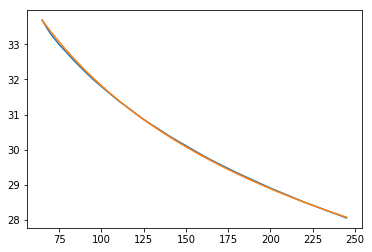

In [15]:
f = [50/log(qty+np.pi*12,np.pi*5.8) for qty,price in prices]
base = prices[0][1]-f[0]
print(base)
plt.plot(
    [qty for qty, price in prices], 
    [price for qty, price in prices],
    [qty for qty, price in prices], 
    [i + base for i in f],
)
plt.show()

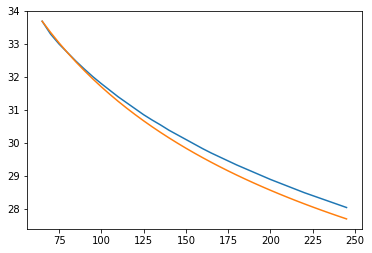